In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

# Q1

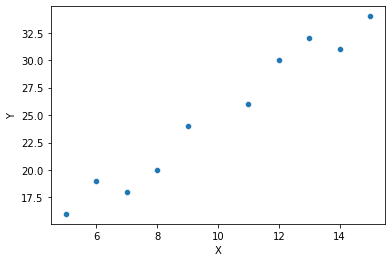

          X         Y
X  1.000000  0.982855
Y  0.982855  1.000000


In [34]:
data = {'X' : [5,6,7,8,9,11,12,13,14,15],
        'Y' : [16,19,18,20,24,26,30,32,31,34]}
df = pd.DataFrame(data)

# 1. Plot the data points
sns.scatterplot(x='X', y='Y', data=df)
plt.show()

# 2. Correlation matrix
print(df.corr())

In [35]:
# 2. Correlation test
print(stats.pearsonr(df['X'], df['Y']))

(0.9828549170039227, 3.70316460416473e-07)


# Q2

In [36]:
# Q2
# 1. Simple Linear Regression
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Y ~ X', data=df).fit()
# coef and R^2
print(model.params)
print(model.rsquared)

Intercept    6.636364
X            1.836364
dtype: float64
0.9660037878787878


In [37]:
# 2. Anova table
print(sm.stats.anova_lm(model, typ=2))

              sum_sq   df           F        PR(>F)
X         370.945455  1.0  227.320334  3.703165e-07
Residual   13.054545  8.0         NaN           NaN


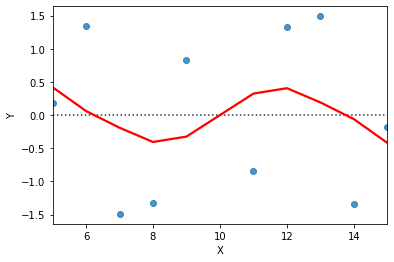

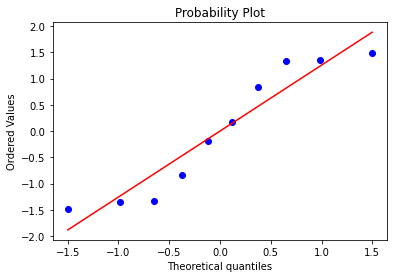

In [38]:
# 3. Residual plot, QQ plot
import statsmodels.stats.api as sms

# Residual plot
residual = model.resid
sns.residplot(x='X', y='Y', data=df, lowess=True, line_kws={'color':'red'})
plt.show()

# QQ plot
stats.probplot(residual, plot=plt)
plt.show()

# Q3

In [39]:
# Q3
# iris data
iris = sns.load_dataset('iris')

# 1. Multiple regression
model = ols('sepal_length ~ petal_length + petal_width + sepal_width', data=iris).fit()
print(model.summary()) # all p-value < 0.05

                            OLS Regression Results                            
Dep. Variable:           sepal_length   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     295.5
Date:                Mon, 19 Jun 2023   Prob (F-statistic):           8.59e-62
Time:                        19:46:31   Log-Likelihood:                -37.321
No. Observations:                 150   AIC:                             82.64
Df Residuals:                     146   BIC:                             94.69
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.8560      0.251      7.401   

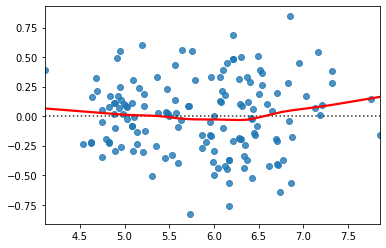

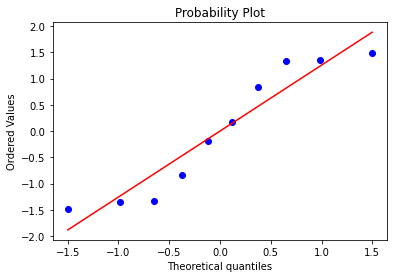

In [40]:
# 3. Residual plot, QQ plot
# Residual vs Fitted plot
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color':'red'})
plt.show()

# QQ plot
stats.probplot(residual, plot=plt)
plt.show()

# Q4

In [41]:
# Q4
data = {'기사님1' : [78,43,122,78,56],
        '기사님2' : [101,110,102,87,121],
        '기사님3' : [99,119,100,59,122],
        '기사님4' : [75,67,121,92,55],}
df = pd.DataFrame(data)

df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['기사님1', '기사님2', '기사님3', '기사님4'])
df_melt.columns = ['index', '기사', '민원수']

# ANOVA
model = ols('민원수 ~ C(기사)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table) # 기사에 따른 민원수의 차이가 없다.

           sum_sq    df         F    PR(>F)
C(기사)     2871.75   3.0  1.631305  0.221662
Residual  9388.80  16.0       NaN       NaN


# Q5

In [42]:
# Q5
data = {'배차간격' : [9, 11, 10, 11, 4, 15, 15, 10, 20, 19, 15, 19, 12, 7, 17, 5, 6, 7],
        '기사님' : np.repeat(['기사1', '기사2', '기사3'], 6),
        '회사' : np.tile(np.repeat(['회사1', '회사2', '회사3'],2 ), 3)}
df = pd.DataFrame(data)

In [43]:
# ANOVA with interaction
model = ols('배차간격 ~ C(기사님) + C(회사) + C(기사님):C(회사)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table) # 회사에 따른 차이 없음, 기사에 따른 차이 있음, 기사와 회사의 상호작용은 없음

                  sum_sq   df         F    PR(>F)
C(기사님)        189.777778  2.0  5.053254  0.033789
C(회사)          32.444444  2.0  0.863905  0.453724
C(기사님):C(회사)   39.888889  4.0  0.531065  0.716511
Residual      169.000000  9.0       NaN       NaN
